# TuC Datenanalyse

In [27]:
# load data
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('../data/order.tbl.short', sep='|')

In [13]:
# Overview
number_of_rows = len(data)
print('Number of lines: ', number_of_rows)
header = data.columns.tolist()
print('Header: ', ','.join(header))
print('First 3 rows:')
print(data[:3])

Number of lines
 199
Header:
 ORDERKEY,CUSTKEY,ORDERSTATUS,TOTALPRICE,ORDERDATE,ORDERPRIORITY,CLERK,SHIPPRIORITY,COMMENT,Unnamed: 9
First 3 rows:
   ORDERKEY  CUSTKEY ORDERSTATUS  TOTALPRICE   ORDERDATE ORDERPRIORITY  \
0         1   468010           O   116666.88  1996-01-02         5-LOW   
1         2   468010           O    19444.48  1996-01-02         5-LOW   
2         3   468010           O   116666.88  1996-01-02      1-URGENT   

             CLERK  SHIPPRIORITY  \
0  Clerk#000005704             0   
1  Clerk#000005704             0   
2  Clerk#000005704             0   

                                             COMMENT  Unnamed: 9  
0  jSmgxOi157kxm gCwQzgNOmiO0MkhCR4N BLj6OQBkl34k...         NaN  
1  jP0BgO31m7Sw6LmC25k3RBw BmRkkjmzBCO4Qij67CN3mQ...         NaN  
2  xxSzlw2hwnM10PijiOz2gP02Qh3OQgm02ykNOwPxhl xRM...         NaN  


## Cardinalities

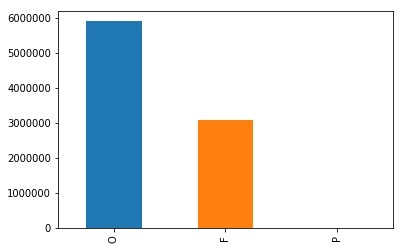

In [25]:
data['ORDERSTATUS'].value_counts().plot(kind='bar')

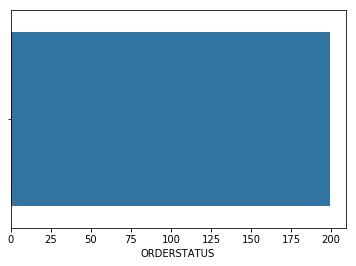

In [32]:
sns.barplot(data['ORDERSTATUS'].value_counts())



 ORDERKEY
Distinct Values:  199


 CUSTKEY
Distinct Values:  1


 ORDERSTATUS
Distinct Values:  1


 TOTALPRICE
Distinct Values:  7


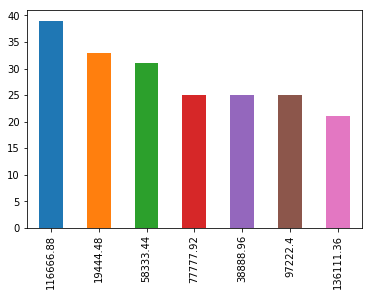



 ORDERDATE
Distinct Values:  1


 ORDERPRIORITY
Distinct Values:  5


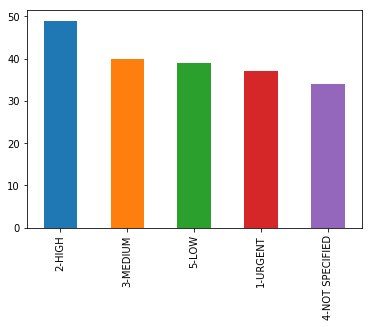



 CLERK
Distinct Values:  1


 SHIPPRIORITY
Distinct Values:  1


 COMMENT
Distinct Values:  199


 Unnamed: 9
Distinct Values:  0


In [34]:
for column in header:
    print('\n\n', column)
    print(20*'=')
    distinct_values = len(data[column].value_counts())
    print("Distinct Values: ", distinct_values)
    if distinct_values < 0.1 * number_of_rows and distinct_values > 1:
        try:
            data[column].value_counts().plot(kind='bar', lw=10)
            plt.show()
        except:
            print("Cannot plot", column)